# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)
print("X: ", X)
print("X_train: ", X_train)
print("y_train: ", y_train)
print("X_test: ", X_test)
print("y_test", y_test)

Generated 50 train samples and 50 test samples
X:  [-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

In [ ]:
x_train_with_bias = np.hstack((X_train, np.ones((X_train.shape[0], 1)))) # still did not get
res = np.linalg.inv(x_train_with_bias.T.dot(x_train_with_bias)).dot(x_train_with_bias.T).dot(y_train)
w = res[0]
b = res[1]
target_y = w * X_test + b

print("w:", w, "b: ", b)
MAE = np.abs(y_test - target_y).sum()
MSE = ((y_test - target_y) ** 2).sum()
print('MAE: ', MAE)
print('MSE: ', MSE)

w: 10.819150360192522 b:  -6.243065702387478
MAE:  91084.15815537277
MSE:  4977716.300993761


In [ ]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
sk_MAE = mae(y_test, target_y)
sk_MSE = mse(y_test, target_y)
print('sklearn.metrics MAE: ', sk_MAE)
print('sklearn.metrics MSE: ', sk_MSE)
print("diff between MAE and sk_MAE: ", np.abs(sk_MAE - MAE))
print("diff between MSE and sk_MSE: ", np.abs(sk_MSE - MSE))

sklearn.metrics MAE:  7.347405240139101
sklearn.metrics MSE:  93.7673768367547
diff between MAE and sk_MAE:  91076.81075013263
diff between MSE and sk_MSE:  4977622.533616925


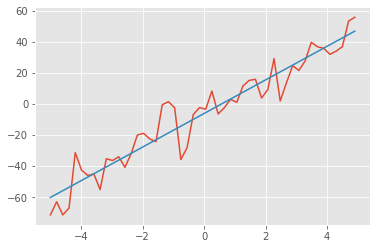

In [ ]:
x = np.linspace(X_train.min(), X_train.max(), 1000)
plt.plot(X_train, y_train)
plt.plot(x, w * x + b)

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])

    # added custom labels:
    data['x_test'] = np.sort(np.random.choice(data['support'], size=n_support-n_train, replace=True))
    data['y_test'] = np.sin(data['x_test']) + 1
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

In [ ]:
x_train_with_bias = np.hstack((data['x_train'].reshape((data['x_train'].shape[0],1)), np.ones((data['x_train'].shape[0],1))))
res = np.linalg.inv(x_train_with_bias.T.dot(x_train_with_bias)).dot(x_train_with_bias.T).dot(data['y_train'])
w = res[0]
b = res[1]
target_y = w * data['x_test'] + b

In [ ]:
print('MAE: ', mae(data['y_test'], target_y))
print('MSE: ', mse(data['y_test'], target_y))

MAE:  0.40428353517343507
MSE:  0.20383706115426573


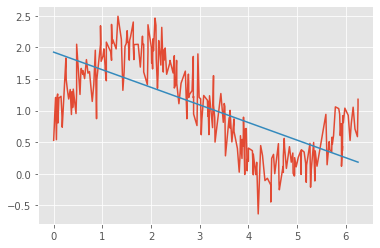

In [ ]:
x = np.linspace(data['x_train'].min(), data['x_train'].max(), 1000)
plt.plot(data['x_train'], data['y_train'])
plt.plot(x, w * x + b)

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(5, include_bias=True)
reshaped_train = data['x_train'].reshape(data['x_train'].shape[0], 1)
reshaped_test = data['x_test'].reshape(data['x_test'].shape[0], 1)
polynom.fit(reshaped_train)
features = polynom.transform(reshaped_train)

In [ ]:
params = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(data['y_train'])

test_features = polynom.transform(reshaped_test)
target_y = test_features.dot(params)

In [ ]:
### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

In [ ]:
print('MAE: ', mae(reshaped_test, target_y))
print('MSE: ', mse(reshaped_test, target_y))

MAE:  2.5012663890000626
MSE:  9.789287633114329


In [ ]:
class CustomModel:
  def fit(self, X, y):
    self.params = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  def predict(self, X):
    return X.dot(self.params)

mse for power:  1  =  0.20383706115426564
mse for power:  2  =  0.20641656445817205
mse for power:  5  =  0.0030546906069681564
mse for power:  7  =  0.0030892329830531024
mse for power:  10  =  0.004038470230346196
mse for power:  13  =  0.13891567952796932


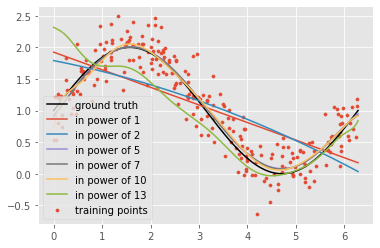

In [ ]:
# Это же ваще капец:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#our function
def f(x):
    return np.sin(x) + 1
x_plot = data['support']
y_true = data['y_test']
x = data['x_train']
y = data['y_train']

X = x.reshape(x.shape[0], 1)
X_plot = x_plot.reshape(x_plot.shape[0], 1)

plt.plot(x_plot, f(x_plot), color='black', label="ground truth")
plt.scatter(x, y, s=10, marker='o', label="training points")
for power in ([1, 2, 5, 7, 10, 13]):
    model = make_pipeline(PolynomialFeatures(power), CustomModel())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    target_y = model.predict(data['x_test'].reshape(-1, 1))
    curlabel = "in power of " + str(power)
    plt.plot(x_plot, y_plot, label=curlabel)
    print('mse for power: ', power, " = " , mse(y_true, target_y))
plt.legend()

In [ ]:
# Вывод: 5 степень лучше всего подходит, так как ошибка меньше

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
house_data = load_boston()
X = house_data['data']
y = house_data['target']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Задание 3.4

In [ ]:
model = CustomModel()
model.fit(X_train, y_train)
print('MAE: ', mae(y_test, model.predict(X_test)))
print('MSE: ', mse(y_test, model.predict(X_test)))

MAE:  3.1939735062508547
MSE:  18.93756358559667


In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков

In [ ]:
dict1 = {}
print(model.params)
for i in range(len(model.params)):
    dict1[i] = model.params[i]
sorted_values = sorted(dict1.values()) # Sort the values
sorted_dict = {}
for i in sorted_values:
    for k in dict1.keys():
        if dict1[k] == i:
            sorted_dict[k] = dict1[k]
            break
main_indexes = list(sorted_dict.keys())[-7:]
model.fit(X_train[:, main_indexes], y_train)
print('MAE: ', mae(y_test, model.predict(X_test[:, main_indexes])))
print('MSE: ', mse(y_test, model.predict(X_test[:, main_indexes])))

[-4.19553697e-02  6.03936577e-02  2.39940311e-03  2.81720127e+00
 -2.63244016e+00  5.86408756e+00 -1.70329409e-02 -1.32532407e+00
  1.94190255e-01 -9.89874907e-03 -2.99332596e-01  1.78519805e-02
 -4.67872370e-01]
MAE:  4.112087453391331
MSE:  27.07573209726451
